<a href="https://colab.research.google.com/github/mahsaghaderan99/DigikalaCommentAnalysis/blob/tokenizer/comment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Installation

In [4]:
!pip install stanza -U

Requirement already up-to-date: stanza in /usr/local/lib/python3.6/dist-packages (1.1.1)


#Imports

In [1]:
import stanza
import numpy as np
import pandas as pd 
import string
import cv2
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
import gensim 
from gensim.models import Word2Vec 

In [3]:
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import concatenate
from keras.utils import to_categorical
from keras.layers import Dropout
from keras.layers import GlobalAveragePooling2D
import tensorflow as tf
from keras.callbacks import ModelCheckpoint 
import time

#Data preparation

In [ ]:
#Save text file into drive

# !ls /content/drive/MyDrive
# !mkdir /content/drive/MyDrive/digikala
# !cp /content/digikala_dataset.txt /content/drive/MyDrive/digikala

In [2]:
x = []
y = []
with open('/content/drive/MyDrive/digikala/digikala_dataset.txt','r') as f:
  for line in f:
    index = line.find('\t')
    dy = line[:index]
    dx = line[index+1:]
    x.append(dx)
    y.append(dy)


In [4]:
x = np.array(x)
y = np.array(y)

In [28]:
punkts = {
    '!':' ',
    ')':' ',
    '(':' ',
    "'":' ',
    '.':' ',
    ':':' ',
    '-':' ',
    ',':' ',
    '*':' ',
    '/':' ',
    '[':' ',
    ']':' ',
    '?':' ',
    '؟':' ',
    '!':' ',
    '}':' ',
    '{':' ',
    '@':' '
}

In [29]:
punct = str.maketrans(punkts)
nopunct_x = [s.translate(punct) for s in x]
nopunct_x = [s.replace('\n',' ').replace('\t',' ') for s in nopunct_x]

In [30]:
data = {'label':y, 
        'comment':nopunct_x} 
df = pd.DataFrame(data) 
df 

,label,comment
0,0,لطفا رنگ سفید رو هم موجود کنید
1,0,با سلام؛ من همین الان میخواستم نوک مدادی بخرم ...
2,0,من یه روز گذاشتم شارژ 12 روز شارژ داشت
3,0,برای خاموش کردن نوار چراغ پایین گوشی از برنامه...
4,0,سلام بر دیجی کالا من میخواستم امروز بخرم ولی ا...
...,...,...
200756,0,لطفا موجود کنین
200757,-1,من 1 ساله دارمش واقعا بده هنگ زیاد داغ شدن زی...
200758,0,اگه دو سیمشم بیاری دیجی کالا و نقد و بررسی هم ...
200759,1,سلام من این گوشیو 2هفته پیش خریدم البته ایم بگ...


In [ ]:
#create csv file
# !touch /content/drive/MyDrive/digikala/digikala.csv

In [31]:
df.to_csv ('/content/drive/MyDrive/digikala/digikala.csv', index = False, header=True)

#Tokenize

##LOad Dataset

In [4]:
df = pd.read_csv('/content/drive/MyDrive/digikala/digikala.csv')

In [5]:
label = np.array(df['label'])
clean_com = np.array(df['comment'])

In [6]:
stanza.download('fa') 

2021-01-07 14:53:30 INFO: Downloading default packages for language: fa (Persian)...
2021-01-07 14:53:30 INFO: File exists: /root/stanza_resources/fa/default.zip.
2021-01-07 14:53:33 INFO: Finished downloading models and saved to /root/stanza_resources.


In [8]:
nlp = stanza.Pipeline(processors='tokenize', lang='fa', tokenize_pretokenized=True, use_gpu=True)
tokens = []
for row in clean_com:
  doc = nlp(row)
  try:
    sentence = list(doc.sentences)[0]
  except:
    print(doc.sentences)
    pass
  tokenz = np.array([token.text for token in sentence.tokens])
  tokens.append(tokenz)

2021-01-07 14:54:21 INFO: Loading these models for language: fa (Persian):
| Processor | Package |
-----------------------
| tokenize  | seraji  |

INFO:stanza:Loading these models for language: fa (Persian):
| Processor | Package |
-----------------------
| tokenize  | seraji  |

2021-01-07 14:54:21 INFO: Use device: cpu
INFO:stanza:Use device: cpu
2021-01-07 14:54:21 INFO: Loading: tokenize
INFO:stanza:Loading: tokenize
2021-01-07 14:54:21 INFO: Done loading processors!
INFO:stanza:Done loading processors!


[]
[]


In [123]:
len(lemmas)

50000

In [ ]:
nlplemm = stanza.Pipeline(processors='tokenize,lemma', lang='fa',use_gpu=True)
lemmas = []
i =0
for row in clean_com[:50000]:
  if i%100 == 0: print(i)
  i +=1
  try:
    sentence = list(nlplemm(row).sentences)[0]
    lemmas.append([word.lemma for word in sentence.words if word.lemma != None])
  except:
    print(doc.sentences)
    continue

2021-01-07 15:24:05 INFO: Loading these models for language: fa (Persian):
| Processor | Package |
-----------------------
| tokenize  | seraji  |
| lemma     | seraji  |

INFO:stanza:Loading these models for language: fa (Persian):
| Processor | Package |
-----------------------
| tokenize  | seraji  |
| lemma     | seraji  |

2021-01-07 15:24:05 INFO: Use device: cpu
INFO:stanza:Use device: cpu
2021-01-07 15:24:05 INFO: Loading: tokenize
INFO:stanza:Loading: tokenize
2021-01-07 15:24:05 INFO: Loading: lemma
INFO:stanza:Loading: lemma
2021-01-07 15:24:05 INFO: Done loading processors!
INFO:stanza:Done loading processors!


0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
18

In [124]:
stopwords = ['از','به','با','را','در','برای',
             'که','ازاینرو','این','ان','آن','ها',
             'آنجا','اینجا','ازجمله','ازروی','ازلحاظ','اش',
             'ات','ام','اید','تان','شان','مان',
             'الان','اند','انکه','او','ایم','اینطور',
             'انطور','اگر','اگرچه','رو','ب','اگه',
             'بلکه','تا','مثل','مثلا','مانند','ما',
             'من','ک','فلذا','لذا','فلان','های',
             'هایی','چه','هم','اما','چون','تو','توی','و','البته']

In [125]:
nplemmas = np.array(lemmas) 
nostopwords = [[token for token in token_row if token not in stopwords] for token_row in nplemmas]
nostopwords = np.array(nostopwords)
model2 = gensim.models.Word2Vec(nostopwords, min_count = 5, size = 150, window = 5,sg=0) 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  This is separate from the ipykernel package so we can avoid doing imports until


In [10]:
nptokens = np.array(tokens) 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


In [36]:
nostopwords = [[token for token in token_row if token not in stopwords] for token_row in nptokens]

In [37]:
nostopwords = np.array(nostopwords)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


In [56]:
model1 = gensim.models.Word2Vec(nostopwords, min_count = 5, size = 150, window = 5,sg=0) 

In [126]:
model = model2

##Similar words

In [127]:
result = model.most_similar_cosmul(positive=['خوب', 'ممنون'], negative=['متوسط'])
result

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar_cosmul` (Method will be removed in 4.0.0, use self.wv.most_similar_cosmul() instead).
  """Entry point for launching an IPython kernel.


[('ممنونم', 1.217738151550293),
 ('مرسی', 1.2057101726531982),
 ('باتشکر', 1.0966006517410278),
 ('خوشحال', 1.0696691274642944),
 ('متشکرم', 1.0283514261245728),
 ('منم', 1.008921504020691),
 ('چیکار', 0.9849681258201599),
 ('تشکر', 0.9819313287734985),
 ('منتظرن', 0.9698219895362854),
 ('ناراحت', 0.9582756757736206)]

In [128]:
result = model.most_similar_cosmul(positive=['متوسط', 'معمولی'], negative=['قبول'])
result

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar_cosmul` (Method will be removed in 4.0.0, use self.wv.most_similar_cosmul() instead).
  """Entry point for launching an IPython kernel.


[('مداوم', 1.6772860288619995),
 ('حداکثر', 1.5063202381134033),
 ('روزمره', 1.5013855695724487),
 ('روزانه', 1.494766116142273),
 ('عادی', 1.351321816444397),
 ('وایفای', 1.3003267049789429),
 ('دوام', 1.2970870733261108),
 ('یکسره', 1.288082242012024),
 ('معمول', 1.2732313871383667),
 ('حین', 1.270707130432129)]

In [129]:
result = model.most_similar_cosmul(positive=['موبایل', 'گوشی'], negative=['کامپیوتر'])
result

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar_cosmul` (Method will be removed in 4.0.0, use self.wv.most_similar_cosmul() instead).
  """Entry point for launching an IPython kernel.


[('پرچمدار', 1.195145845413208),
 ('گوشیه', 1.192892074584961),
 ('گوشیا', 1.1809098720550537),
 ('غول', 1.1321289539337158),
 ('میان', 1.0753382444381714),
 ('برند', 1.068725824356079),
 ('فبلت', 1.0516146421432495),
 ('کمپانی', 1.0365526676177979),
 ('گوشیهاش', 1.0211732387542725),
 ('z1', 1.0174870491027832)]

In [155]:
result = model.most_similar_cosmul(positive=['سامسونگ', 'گوشی'], negative=['هواوی'])
result

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar_cosmul` (Method will be removed in 4.0.0, use self.wv.most_similar_cosmul() instead).
  """Entry point for launching an IPython kernel.


[('دستگاه', 0.8232766389846802),
 ('تبلت', 0.8201547861099243),
 ('طوری', 0.8194299340248108),
 ('محصول', 0.8046111464500427),
 ('اون', 0.7765718102455139),
 ('گوشیه', 0.7650086879730225),
 ('نگه', 0.7641287446022034),
 ('هاش', 0.7637757658958435),
 ('قلم', 0.7628539800643921),
 ('طراحی', 0.761163592338562)]

!pip uninstall torch
!pip install torch


##Test word2vec Model

In [134]:
model.similarity('بد', 'عالی')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


0.35581672

In [135]:
model.similarity('بو', 'طعم')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


0.5344515

In [136]:
model.similarity('سفید', 'عالی')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


-0.04576087

In [137]:
model.similarity('بد', 'خش')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


0.25489292

In [138]:
model.similarity('بد', 'تیره')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


0.04512664

In [144]:
model.similarity('دار', 'دوست')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


-0.022625789

In [143]:
model.similarity('ندار', 'دوست')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


0.054005112

In [145]:
model.similarity('عالی', 'مرسی')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


-0.2248378

In [146]:
model.similarity('مرسی', 'ممنون')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


0.7241453

In [147]:
model.similarity('تشکر', 'ممنون')


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


0.61821705

In [148]:
model.similarity('افتضاح', 'ممنون')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


-0.2729264

In [149]:
model.similarity('مرسی', 'افتضاح')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


-0.37194964

In [150]:
model.similarity('توقع', 'سفید')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


-0.098697655

In [151]:
model.similarity('خوب', 'بد')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


0.5028223

#CNN

In [28]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix


def evaluation(y_test, y_pred, fig_name, title):
    '''
    Prints accuracy and F1-score and plots confusion matrix and saves result image.

    Parameters:
        y_test (numpy.ndarray) : test labels (ground truth)
        y_pred (numpy.ndarray) : predicted labels 
        fig_name (str): The name of the image of the plot.
        title (str): The caption of the plot.
    '''

    acc = accuracy_score(y_test, y_pred)
    print('Accuracy for', title, '=', acc)
    f1 = f1_score(y_test, y_pred, average = 'macro')
    print('F1 score for', title, '=', f1)
    cm = confusion_matrix(y_test, y_pred)
    df_cm = pd.DataFrame(cm, range(10), range(10))
    plt.figure(figsize = (10, 7))
    sn.set(font_scale = 1.4) # for label size
    sn.heatmap(df_cm , annot = True, annot_kws = {"size" : 16}, fmt = 'g') # font size
    plt.title(title)
    plt.savefig(fig_name + '.png')
    plt.show()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 28, 28, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0         
_________________________________________________________________
dense (Dense)                (None, 64)                802880    
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080  

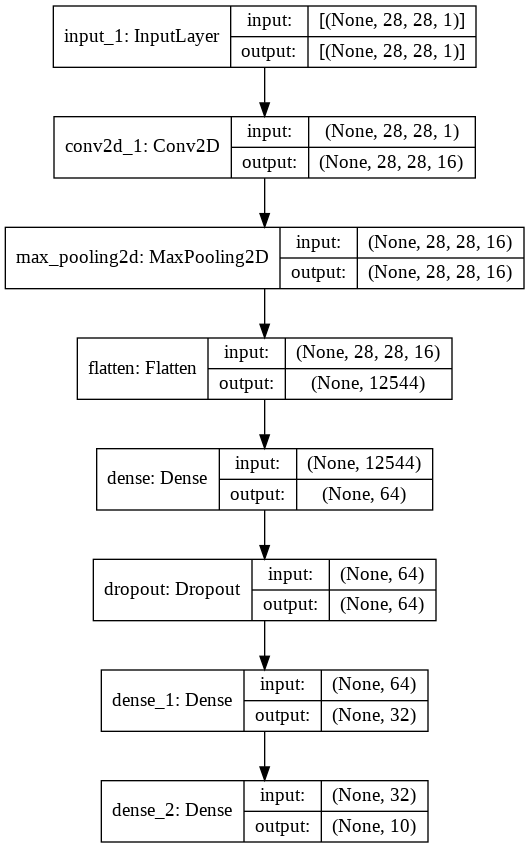

In [30]:
def inception_module(layer_in, f1, f2, f3):
	conv1 = Conv2D(f1, (1,1), padding='same', activation='relu')(layer_in)
	conv3 = Conv2D(f2, (3,3), padding='same', activation='relu')(layer_in)
	conv51 = Conv2D(f3, (3,3), padding='same', activation='relu')(layer_in)
	conv5 = Conv2D(f3, (3,3), padding='same', activation='relu')(conv51)
	pool = MaxPooling2D((3,3), strides=(1,1), padding='same')(layer_in)
	layer_out = concatenate([conv1, conv3, conv5, pool], axis=-1)
	return layer_out
 
visible = Input(shape=(28,28,1))
# convlayer = naive_inception_module(visible, 64, 64, 32)
conv1 = Conv2D(32, (3,3), padding='same', activation='relu')(visible)
conv1 = Conv2D(16, (3,3), padding='same', activation='relu')(visible)
pool1 = MaxPooling2D((3,3), strides=(1,1), padding='same')(conv1)
# inception = inception_module(pool1, 32, 64, 16)
# pool2 = MaxPooling2D((3,3), strides=(1,1), padding='same')(inception)
# gavgpool = GlobalAveragePooling2D()(pool2)
gavgpool = Flatten()(pool1)
dens1 = Dense(64, activation='relu')(gavgpool)
# dens2 = Dense(128, activation='relu')(dens1, activation='relu')
drop2 = Dropout(0.2)(dens1)
dens3 = Dense(32, activation='relu')(drop2)
dens4 = Dense(10, activation='sigmoid')(dens3)
model = Model(inputs=visible, outputs=dens4)

model.summary()
plot_model(model, show_shapes=True, to_file='naive_inception_module.png')

In [ ]:
y = to_categorical(y_train)
x = x_train/255
x = np.expand_dims(x,3)
x_testn = x_test/255
x_testn = np.expand_dims(x_testn,3)
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
checkpoint = ModelCheckpoint('model.h5', verbose=1, monitor='val_accuracy',save_best_only=True,save_weights_only=True, mode='auto')  
with tf.device('/device:GPU:0'):
  start_time = time.time()
  history = model.fit(x=x,y = y,validation_split=0.2 ,epochs=25,batch_size =1000,callbacks=[checkpoint])
  print("--- %s seconds ---" % (time.time() - start_time))